# Real-Time

In [9]:
from tropycal import tracks, recon, realtime
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime

import matplotlib.colors as mc

In [10]:
# List current storms
realtime_obj = realtime.Realtime()
storm_list = realtime_obj.storms
storm_list

--> Starting to read in current storm data
--> Completed reading in current storm data (5.37 seconds)


['AL062024', 'AL922024']

Choose one of these active storms and use its name below

In [11]:
from tropycal import realtime
realtime_obj = realtime.Realtime()
storm = realtime_obj.get_storm('AL062024')

--> Starting to read in current storm data
--> Completed reading in current storm data (3.98 seconds)


In [12]:
forecast = storm.get_forecast_realtime()
models = storm.get_operational_forecasts()
now = storm.get_realtime_info()

Text(-104, 1, 'Data via troPYcal')

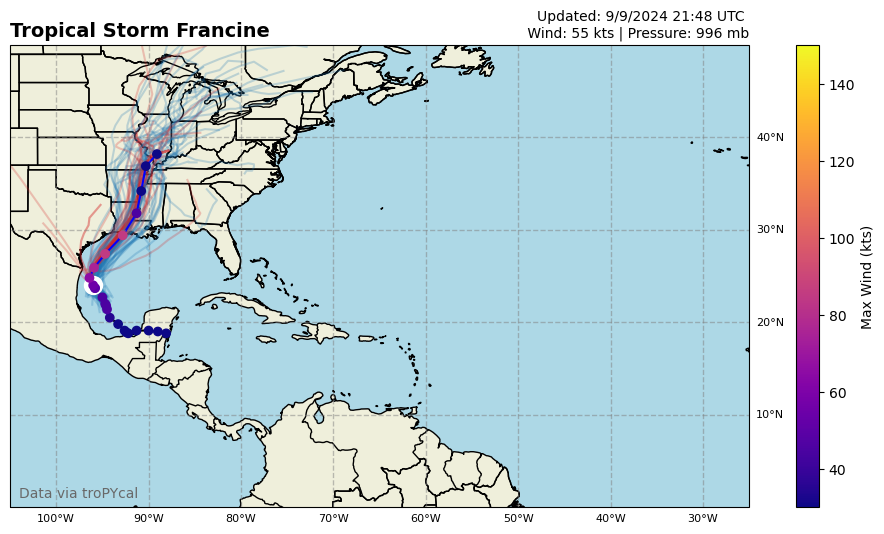

In [13]:
time = datetime.datetime.utcnow()

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Past
plt.plot(storm.lon, storm.lat, transform=ccrs.PlateCarree(), c='k')
plt.scatter(storm.lon, storm.lat, c=storm.vmax, cmap='plasma', transform=ccrs.PlateCarree(), zorder=12, 
                 vmin=30, vmax=150)

# Models
for key in models:
    m = key
    h = list(models[m])[-1]
    mod_time = datetime.datetime(int(h[:4]), int(h[4:6]), int(h[6:8]), int(h[8:10]))
    delta = time-mod_time
    if (delta.days >= 1) & ((delta.seconds/3600) >= 6):
        lats = 0
        lons = 0
    elif ((delta.seconds/3600) <= 6):
        lats = models[m][h]['lat']
        lons = models[m][h]['lon']
        plt.plot(lons, lats, c='tab:red', alpha=0.25)
    else:
        lats = models[m][h]['lat']
        lons = models[m][h]['lon']
        plt.plot(lons, lats, c='tab:blue', alpha=0.25)


# Forecast
plt.plot(forecast['lon'], forecast['lat'], transform=ccrs.PlateCarree(), c='blue')
sc = plt.scatter(forecast['lon'], forecast['lat'], c=forecast['vmax'], cmap='plasma', transform=ccrs.PlateCarree(),
                zorder=12, vmin=30, vmax=150)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)


# Current Info
plt.scatter(now['lon'], now['lat'], s=120, facecolors='w', edgecolors='w', linewidths=3, 
            transform=ccrs.PlateCarree(), zorder=11)


cbar = plt.colorbar(sc)
cbar.set_label('Max Wind (kts)')

xmax = -25
xmin = -105
ymax = 50
ymin = 0
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
# gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

if now['wind_kt']>=64:
    plt.title(f'Hurricane {now["name"]}', loc='left', fontweight='bold', fontsize=14)
elif now['wind_kt']>=35:
    plt.title(f'Tropical Storm {now["name"]}', loc='left', fontweight='bold', fontsize=14)
else:
    plt.title(f'Tropical Depression {now["name"]}', loc='left', fontweight='bold', fontsize=14)
    
plt.title(f'Updated: {time.month}/{time.day}/{time.year} {time.hour}:{time.minute} UTC \n Wind: {now["wind_kt"]} kts | Pressure: {now["mslp"]} mb', 
          loc='right',
          fontsize=10)

plt.text(xmin+1, ymin+1, 'Data via troPYcal', fontsize=10, c='dimgray')

# plt.savefig(f'{now["name"]}_{time.month}_{time.day}_{time.year}_{time.hour}Z.png',
#            dpi=200, bbox_inches='tight')

Text(1.0, 1.0, 'Updated: 9/9/2024 21:00 UTC \n Wind: 65 mph | Pressure: 996 mb')

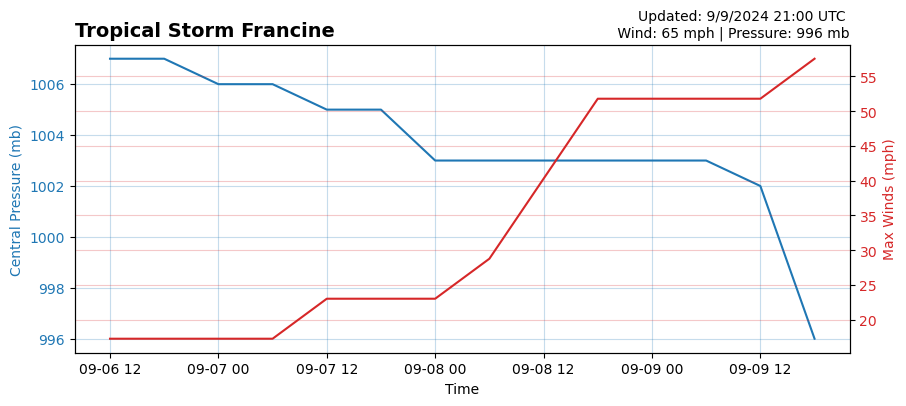

In [14]:
fig, ax1 = plt.subplots(figsize=(10,4))

color='tab:blue'
ax1.plot(storm.time, storm.mslp, color=color)
#ax1.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('Central Pressure (mb)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(color=color, alpha=0.25)

ax2 = ax1.twinx()
color='tab:red'
ax2.plot(storm.time, storm.vmax*1.151, color=color)
#ax1.grid()
ax2.set_ylabel('Max Winds (mph)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(color=color, alpha=0.25)

time = now['time_utc']

if now['wind_kt']>=64:
    plt.title(f'Hurricane {now["name"]}', loc='left', fontweight='bold', fontsize=14)
elif now['wind_kt']>=35:
    plt.title(f'Tropical Storm {now["name"]}', loc='left', fontweight='bold', fontsize=14)
else:
    plt.title(f'Tropical Depression {now["name"]}', loc='left', fontweight='bold', fontsize=14)
    
plt.title(f'Updated: {time.month}/{time.day}/{time.year} {time.hour}:00 UTC \n Wind: {now["wind_mph"]} mph | Pressure: {now["mslp"]} mb', 
          loc='right',
          fontsize=10)

#ax1.text(storm.time[0]-datetime.timedelta(hours=7), 917, 'Data via troPYcal', fontsize=10, c='dimgray')

# plt.savefig(f'{now["name"]}_timeseries_{time.month}_{time.day}_{time.year}_{time.hour}Z.png',
#             dpi=200, bbox_inches='tight')

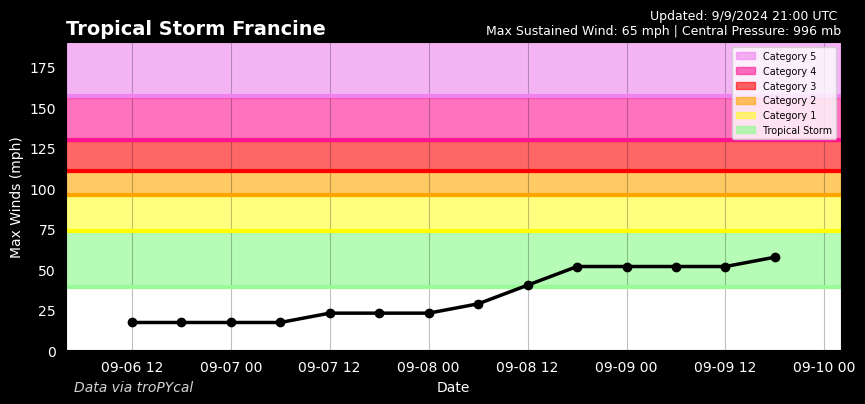

In [15]:
fig, ax1 = plt.subplots(figsize=(10,4))

color='k'
ax1.plot(storm.time, storm.vmax*1.151, color=color, zorder=15, linewidth=2.5)
ax1.scatter(storm.time, storm.vmax*1.151, color=color, zorder=15)
#ax1.grid()
ax1.set_xlabel('Date', color='w')
ax1.set_ylabel('Max Winds (mph)', color='w')
ax1.tick_params(axis='y', labelcolor='w')
ax1.tick_params(axis='x', labelcolor='w')
ax1.grid(color=color, alpha=0.25, axis='x')

plt.xlim([storm.time[0]-datetime.timedelta(hours=8), 
          storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)])
plt.ylim([0, 190])


# Background
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
                 [73, 73], 
                 [39, 39], color='palegreen',
                 alpha=0.7, label='Tropical Storm')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
                 [95, 95], 
                 [74, 74], color='yellow',
                 alpha=0.5, label='Category 1')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
                 [110, 110], 
                 [96, 96], color='orange',
                 alpha=0.6, label='Category 2')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
                 [129, 129], 
                 [111, 111], color='red',
                 alpha=0.6, label='Category 3')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
                 [156, 156], 
                 [130, 130], color='deeppink',
                 alpha=0.6, label='Category 4')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
                 [220, 220], 
                 [157, 157], color='violet',
                 alpha=0.6, label='Category 5')

plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
         [39, 39], color='palegreen', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
         [74, 74], color='yellow', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
         [96, 96], color='orange', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
         [111, 111], color='red', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
         [130, 130], color='deeppink', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          storm.time[len(storm.time)-1]+datetime.timedelta(hours=8)], 
         [157, 157], color='violet', linewidth=3)


time = now['time_utc']

if now['wind_kt']>=64:
    plt.title(f'Hurricane {now["name"]}  |  Cat {now["category"]}', loc='left', fontweight='bold', fontsize=14,
             color='w')
elif now['wind_kt']>=35:
    plt.title(f'Tropical Storm {now["name"]}', loc='left', fontweight='bold', fontsize=14, color='w')
else:
    plt.title(f'Tropical Depression {now["name"]}', loc='left', fontweight='bold', fontsize=14, color='w')
    
plt.title(f'Updated: {time.month}/{time.day}/{time.year} {time.hour}:00 UTC \n Max Sustained Wind: {now["wind_mph"]} mph | Central Pressure: {now["mslp"]} mb', 
          loc='right',
          fontsize=9, color='w')

ax1.text(storm.time[0]-datetime.timedelta(hours=7), -25, 'Data via troPYcal', fontsize=10, fontstyle='italic', 
         c='lightgray')

#plt.legend(fontsize='small')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], fontsize='x-small')

fig.patch.set_facecolor('k')

# plt.savefig(f'{now["name"]}_windtimeseries_{time.month}_{time.day}_{time.year}_{time.hour}Z.png',
#             dpi=200, bbox_inches='tight')

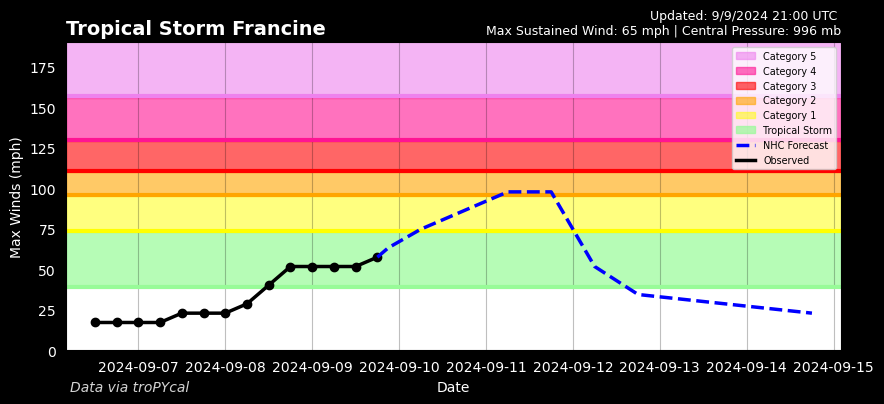

In [16]:
fig, ax1 = plt.subplots(figsize=(10,4))

color='k'
ax1.plot(storm.time, storm.vmax*1.151, color=color, zorder=15, linewidth=2.5, label='Observed')
ax1.scatter(storm.time, storm.vmax*1.151, color=color, zorder=15)
#ax1.grid()
ax1.set_xlabel('Date', color='w')
ax1.set_ylabel('Max Winds (mph)', color='w')
ax1.tick_params(axis='y', labelcolor='w')
ax1.tick_params(axis='x', labelcolor='w')
ax1.grid(color=color, alpha=0.25, axis='x')

# Forecast
f_times = []
f_winds = []
for f in forecast['fhr']:
    t = forecast['init'] + datetime.timedelta(hours=f)
    f_times.append(t)
for w in forecast['vmax']:
    f_winds.append(w*1.151)
    
ax1.plot(f_times, f_winds, color='b', zorder=15, linewidth=2.5, linestyle='--', label='NHC Forecast')
#ax1.scatter(storm.time, storm.vmax*1.151, color=color, zorder=15)    



plt.xlim([storm.time[0]-datetime.timedelta(hours=8), 
          f_times[len(f_times)-1]+datetime.timedelta(hours=8)])
plt.ylim([0, 190])


# Background
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
                 [73, 73], 
                 [39, 39], color='palegreen',
                 alpha=0.7, label='Tropical Storm')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
                 [95, 95], 
                 [74, 74], color='yellow',
                 alpha=0.5, label='Category 1')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
                 [110, 110], 
                 [96, 96], color='orange',
                 alpha=0.6, label='Category 2')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
                 [129, 129], 
                 [111, 111], color='red',
                 alpha=0.6, label='Category 3')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
                 [156, 156], 
                 [130, 130], color='deeppink',
                 alpha=0.6, label='Category 4')
plt.fill_between([storm.time[0]-datetime.timedelta(hours=8), 
                  f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
                 [220, 220], 
                 [157, 157], color='violet',
                 alpha=0.6, label='Category 5')

plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
         [39, 39], color='palegreen', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
         [74, 74], color='yellow', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
         [96, 96], color='orange', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
         [111, 111], color='red', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
         [130, 130], color='deeppink', linewidth=3)
plt.plot([storm.time[0]-datetime.timedelta(hours=8), 
          f_times[len(f_times)-1]+datetime.timedelta(hours=8)], 
         [157, 157], color='violet', linewidth=3)


time = now['time_utc']

if now['wind_kt']>=64:
    plt.title(f'Hurricane {now["name"]}  |  Cat {now["category"]}', loc='left', fontweight='bold', fontsize=14,
             color='w')
elif now['wind_kt']>=35:
    plt.title(f'Tropical Storm {now["name"]}', loc='left', fontweight='bold', fontsize=14, color='w')
else:
    plt.title(f'Tropical Depression {now["name"]}', loc='left', fontweight='bold', fontsize=14, color='w')
    
plt.title(f'Updated: {time.month}/{time.day}/{time.year} {time.hour}:00 UTC \n Max Sustained Wind: {now["wind_mph"]} mph | Central Pressure: {now["mslp"]} mb', 
          loc='right',
          fontsize=9, color='w')

ax1.text(storm.time[0]-datetime.timedelta(hours=7), -25, 'Data via troPYcal', fontsize=10, fontstyle='italic', 
         c='lightgray')

#plt.legend(fontsize='small')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], fontsize='x-small')

fig.patch.set_facecolor('k')

plt.savefig(f'{now["name"]}_windtimeseries_{time.month}_{time.day}_{time.year}_{time.hour}Z.png',
            dpi=200, bbox_inches='tight')

# Hurricane Dashboard

In [17]:
from tropycal import realtime
realtime_obj = realtime.Realtime()

--> Starting to read in current storm data
--> Completed reading in current storm data (3.94 seconds)


/Users/ecwolff3/opt/anaconda3/envs/buoy/lib/python3.9/site-packages/tropycal/realtime/storm.py:884: UserWarning: NHC does not issue public advisories on invests. Defaulting to best track method.
  warnings.warn(msg)
/Users/ecwolff3/opt/anaconda3/envs/buoy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = super().scatter(*args, **kwargs)


Text(-114, 1, 'Data via troPYcal')

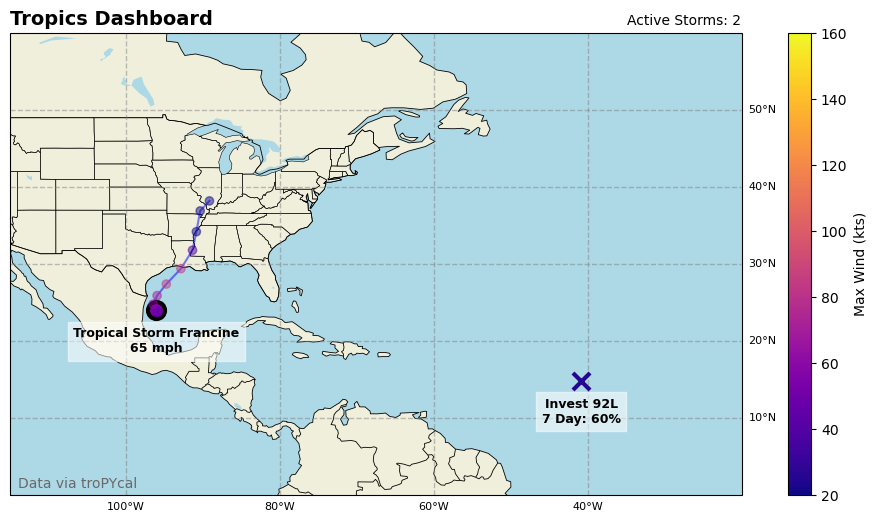

In [18]:
time = datetime.datetime.utcnow()

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

storm_list = realtime_obj.storms
for s in storm_list:
    if int(s[2:4])<90:
        flag = 1
        storm = realtime_obj.get_storm(s)
        forecast = storm.get_forecast_realtime()
        now = storm.get_realtime_info()
    else:
        flag = 0
        storm = realtime_obj.get_storm(s)
        now = storm.get_realtime_info()
        prob = storm.get_realtime_formation_prob()['prob_7day']
        
    if flag == 1:
        # Forecast
        plt.plot(forecast['lon'], forecast['lat'], transform=ccrs.PlateCarree(), c='blue', alpha=0.5)
        plt.scatter(forecast['lon'], forecast['lat'], c=forecast['vmax'], cmap='plasma', transform=ccrs.PlateCarree(),
                        zorder=12, vmin=30, vmax=150, alpha=0.5)

    # Current Info
    if flag == 1:
        plt.scatter(now['lon'], now['lat'], s=150, facecolors='w', edgecolors='k', linewidths=3, 
                    transform=ccrs.PlateCarree(), zorder=11, c=now['wind_kt'], cmap='plasma',
                    vmin=20, vmax=160)
        t = plt.text(now['lon'], now['lat']-4, 
                     f'{now["type"]} {now["name"]}' '\n' f'{now["wind_mph"]} mph', 
                     horizontalalignment='center',
                     fontweight='bold', verticalalignment='center', fontsize=9)
        t.set_bbox(dict(facecolor='w', alpha=0.55, edgecolor='w'))
    else:
        sc = plt.scatter(now['lon'], now['lat'], s=150, facecolors='k', edgecolors='w', linewidths=3, 
                    transform=ccrs.PlateCarree(), zorder=11, marker='x', c=now['wind_kt'], cmap='plasma',
                    vmin=20, vmax=160)
        t = plt.text(now['lon'], now['lat']-4, 
                     f'{now["type"]} {now["name"]}' '\n' f'7 Day: {prob}', 
                     horizontalalignment='center',
                     fontweight='bold', verticalalignment='center', fontsize=9)
        t.set_bbox(dict(facecolor='w', alpha=0.55, edgecolor='w'))
    
        
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.STATES, linewidth=0.4)
    
cbar = plt.colorbar(sc)
cbar.set_label('Max Wind (kts)')

xmax = -20
xmin = -115
ymax = 60
ymin = 0
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
# gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.title(f'Tropics Dashboard', loc='left', fontweight='bold', fontsize=14)
plt.title(f'Active Storms: {len(storm_list)}', loc='right', fontsize=10)

plt.text(xmin+1, ymin+1, 'Data via troPYcal', fontsize=10, c='dimgray')

In [19]:
# Add sst contours and satellite overlay

In [20]:
from siphon.catalog import TDSCatalog
from siphon.http_util import session_manager
import xarray as xr

In [21]:
cat = TDSCatalog('https://www.ncei.noaa.gov/thredds/catalog/ncFC/fc-oisst-daily-avhrr-only-dly-prelim/files/catalog.xml')
print(list(cat.catalog_refs))

[]


In [22]:
list(cat.datasets)

['Latest OISST Preliminary Daily AVHRR-only Feature Collection File',
 '202408/oisst-avhrr-v02r01.20240805_preliminary.nc',
 '202408/oisst-avhrr-v02r01.20240826_preliminary.nc',
 '202408/oisst-avhrr-v02r01.20240827_preliminary.nc',
 '202408/oisst-avhrr-v02r01.20240828_preliminary.nc',
 '202408/oisst-avhrr-v02r01.20240829_preliminary.nc',
 '202408/oisst-avhrr-v02r01.20240830_preliminary.nc',
 '202408/oisst-avhrr-v02r01.20240831_preliminary.nc',
 '202409/oisst-avhrr-v02r01.20240901_preliminary.nc',
 '202409/oisst-avhrr-v02r01.20240902_preliminary.nc',
 '202409/oisst-avhrr-v02r01.20240903_preliminary.nc',
 '202409/oisst-avhrr-v02r01.20240904_preliminary.nc',
 '202409/oisst-avhrr-v02r01.20240905_preliminary.nc',
 '202409/oisst-avhrr-v02r01.20240906_preliminary.nc',
 '202409/oisst-avhrr-v02r01.20240907_preliminary.nc']

In [23]:
dataset = cat.datasets[len(cat.datasets)-1]
dataset

202409/oisst-avhrr-v02r01.20240907_preliminary.nc

In [24]:
data = xr.open_dataset(dataset.access_urls['OPENDAP'],
                         decode_cf=False)

In [25]:
data.sst.mean()

<xarray.DataArray 'sst' ()>
array(627.90776138)

/Users/ecwolff3/opt/anaconda3/envs/buoy/lib/python3.9/site-packages/tropycal/realtime/storm.py:884: UserWarning: NHC does not issue public advisories on invests. Defaulting to best track method.
  warnings.warn(msg)
/Users/ecwolff3/opt/anaconda3/envs/buoy/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = super().scatter(*args, **kwargs)
/Users/ecwolff3/opt/anaconda3/envs/buoy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/ecwolff3/opt/anaconda3/envs/buoy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to

Text(-114, 1, 'Data via troPYcal; NOAA NCEI')

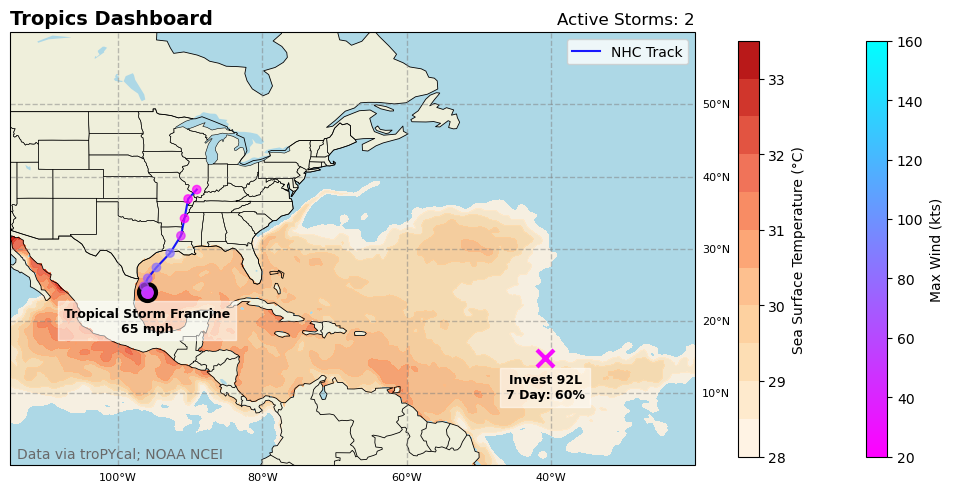

In [26]:
time = datetime.datetime.utcnow()

fig = plt.figure(figsize=(13,6))
ax = plt.axes(projection=ccrs.PlateCarree())

storm_list = realtime_obj.storms
for s in storm_list:
    if int(s[2:4])<90:
        flag = 1
        storm = realtime_obj.get_storm(s)
        forecast = storm.get_forecast_realtime()
        now = storm.get_realtime_info()
    else:
        flag = 0
        storm = realtime_obj.get_storm(s)
        now = storm.get_realtime_info()
        prob = storm.get_realtime_formation_prob()['prob_7day']
        
    if flag == 1:
        # Forecast
        plt.plot(forecast['lon'], forecast['lat'], transform=ccrs.PlateCarree(), c='blue', alpha=0.9)
        plt.scatter(forecast['lon'], forecast['lat'], c=forecast['vmax'], cmap='cool_r', transform=ccrs.PlateCarree(),
                        zorder=12, vmin=30, vmax=150, alpha=0.7)

    # Current Info
    if flag == 1:
        plt.scatter(now['lon'], now['lat'], s=150, facecolors='w', edgecolors='k', linewidths=3, 
                    transform=ccrs.PlateCarree(), zorder=11, c=now['wind_kt'], cmap='cool_r',
                    vmin=20, vmax=160)
        t = plt.text(now['lon'], now['lat']-4, 
                     f'{now["type"]} {now["name"]}' '\n' f'{now["wind_mph"]} mph', 
                     horizontalalignment='center',
                     fontweight='bold', verticalalignment='center', fontsize=9)
        t.set_bbox(dict(facecolor='w', alpha=0.55, edgecolor='w'))
    else:
        sc = plt.scatter(now['lon'], now['lat'], s=150, facecolors='k', edgecolors='w', linewidths=3, 
                    transform=ccrs.PlateCarree(), zorder=11, marker='x', c=now['wind_kt'], cmap='cool_r',
                    vmin=20, vmax=160)
        t = plt.text(now['lon'], now['lat']-4, 
                     f'{now["type"]} {now["name"]}' '\n' f'7 Day: {prob}', 
                     horizontalalignment='center',
                     fontweight='bold', verticalalignment='center', fontsize=9)
        t.set_bbox(dict(facecolor='w', alpha=0.55, edgecolor='w'))
    
        
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.STATES, linewidth=0.4)
    
cbar = plt.colorbar(sc, shrink=0.9, pad=0)
cbar.set_label('Max Wind (kts)')


# ct = plt.contour(data.lon, data.lat, data.sst[0,0,:,:], levels=[2800, 2900, 3000, 3100], 
#                  transform=ccrs.PlateCarree(), cmap='gist_heat', 
#                  vmin = 2800, vmax=3100, linewidths=0.5)
ct = plt.contourf(data.lon, data.lat, data.sst[0,0,:,:]/100, 
                 transform=ccrs.PlateCarree(), cmap='OrRd', levels=np.arange(28, 34, 0.5),
                 vmin = 28, vmax=34, alpha=0.9)

cbar2 = plt.colorbar(ct, shrink=0.9)
cbar2.set_label('Sea Surface Temperature (°C)')


plt.plot([0,0], [0,0.1], color='b', label='NHC Track', alpha=0.9)
plt.legend()


xmax = -20
xmin = -115
ymax = 60
ymin = 0
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
# gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.title(f'Tropics Dashboard', loc='left', fontweight='bold', fontsize=14)
plt.title(f'Active Storms: {len(storm_list)}', loc='right', fontsize=12)

plt.text(xmin+1, ymin+1, 'Data via troPYcal; NOAA NCEI', fontsize=10, c='dimgray')

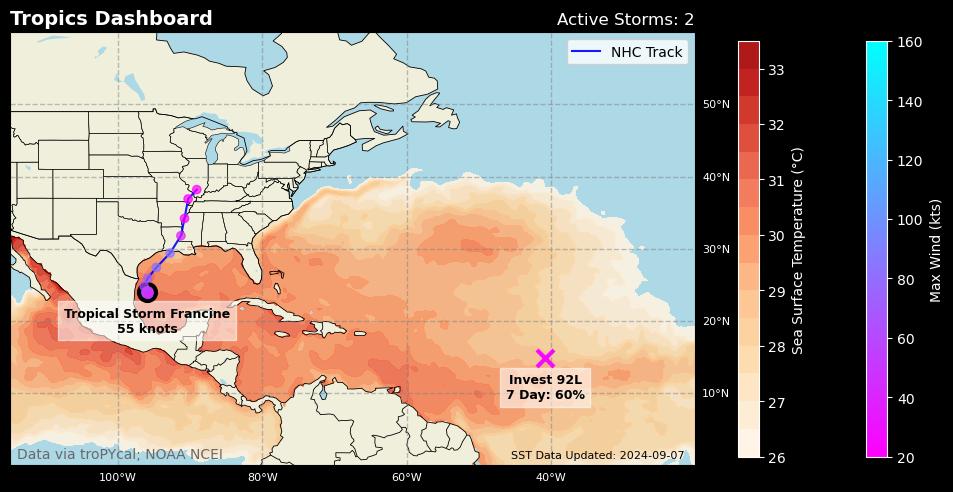

In [27]:
time = datetime.datetime.utcnow()

fig = plt.figure(figsize=(13,6))
ax = plt.axes(projection=ccrs.PlateCarree())

storm_list = realtime_obj.storms
for s in storm_list:
    if int(s[2:4])<90:
        flag = 1
        storm = realtime_obj.get_storm(s)
        forecast = storm.get_forecast_realtime()
        now = storm.get_realtime_info()
    else:
        flag = 0
        storm = realtime_obj.get_storm(s)
        now = storm.get_realtime_info()
        prob = storm.get_realtime_formation_prob()['prob_7day']
        
    if flag == 1:
        # Forecast
        plt.plot(forecast['lon'], forecast['lat'], transform=ccrs.PlateCarree(), c='blue', alpha=0.9)
        plt.scatter(forecast['lon'], forecast['lat'], c=forecast['vmax'], cmap='cool_r', transform=ccrs.PlateCarree(),
                        zorder=12, vmin=30, vmax=150, alpha=0.7)

    # Current Info
    if flag == 1:
        plt.scatter(now['lon'], now['lat'], s=150, facecolors='w', edgecolors='k', linewidths=3, 
                    transform=ccrs.PlateCarree(), zorder=11, c=now['wind_kt'], cmap='cool_r',
                    vmin=20, vmax=160)
        t = plt.text(now['lon'], now['lat']-4, 
                     f'{now["type"]} {now["name"]}' '\n' f'{now["wind_kt"]} knots', 
                     horizontalalignment='center',
                     fontweight='bold', verticalalignment='center', fontsize=9)
        t.set_bbox(dict(facecolor='w', alpha=0.55, edgecolor='w'))
    else:
        sc = plt.scatter(now['lon'], now['lat'], s=150, facecolors='k', edgecolors='w', linewidths=3, 
                    transform=ccrs.PlateCarree(), zorder=11, marker='x', c=now['wind_kt'], cmap='cool_r',
                    vmin=20, vmax=160)
        t = plt.text(now['lon'], now['lat']-4, 
                     f'{now["type"]} {now["name"]}' '\n' f'7 Day: {prob}', 
                     horizontalalignment='center',
                     fontweight='bold', verticalalignment='center', fontsize=9)
        t.set_bbox(dict(facecolor='w', alpha=0.55, edgecolor='w'))
    
        
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.STATES, linewidth=0.4)
    
cbar = plt.colorbar(sc, shrink=0.9, pad=0)
cbar.set_label('Max Wind (kts)', color='w')
cbar.ax.yaxis.set_tick_params(color='w')
cbar.outline.set_edgecolor('w')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='w')


# ct = plt.contour(data.lon, data.lat, data.sst[0,0,:,:], levels=[2800, 2900, 3000, 3100], 
#                  transform=ccrs.PlateCarree(), cmap='gist_heat', 
#                  vmin = 2800, vmax=3100, linewidths=0.5)
ct = plt.contourf(data.lon, data.lat, data.sst[0,0,:,:]/100, 
                 transform=ccrs.PlateCarree(), cmap='OrRd', levels=np.arange(26, 34, 0.5),
                 vmin = 26, vmax=34, alpha=0.9)

cbar2 = plt.colorbar(ct, shrink=0.9)
cbar2.set_label('Sea Surface Temperature (°C)', color='w')
cbar2.ax.yaxis.set_tick_params(color='w')
cbar2.outline.set_edgecolor('w')
plt.setp(plt.getp(cbar2.ax.axes, 'yticklabels'), color='w')


plt.plot([0,0], [0,0.1], color='b', label='NHC Track', alpha=0.9)
plt.legend()


xmax = -20
xmin = -115
ymax = 60
ymin = 0
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
# gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 8, 'color': 'w'}
gl.ylabel_style = {'size': 8, 'color': 'w'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.title(f'Tropics Dashboard', loc='left', fontweight='bold', fontsize=14, color='w')
plt.title(f'Active Storms: {len(storm_list)}', loc='right', fontsize=12, color='w')

plt.text(xmin+1, ymin+1, 'Data via troPYcal; NOAA NCEI', fontsize=10, c='dimgray')

plt.text(-21.5, 1, f'SST Data Updated: {data.time_coverage_start[:10]}', fontsize=8, 
         horizontalalignment='right')

fig.patch.set_facecolor('k')

plt.savefig(f'{time.month}_{time.day}_{time.year}_{time.hour}_Dashboard.png',
           dpi=200, bbox_inches='tight')